In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
NoDataPath = Path("C:/Users/DELL/archive/no")
YesDataPath = Path("C:/Users/DELL/archive/yes")

In [6]:
NoJPGPath = list(NoDataPath.glob(r"*.jpg"))
YesJPGPath = list(YesDataPath.glob(r"*.jpg"))

In [7]:
print(NoJPGPath[0:10])
print("-----"*10)
print(YesJPGPath[0:10])

[WindowsPath('C:/Users/DELL/archive/no/no0.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1.jpg'), WindowsPath('C:/Users/DELL/archive/no/no10.jpg'), WindowsPath('C:/Users/DELL/archive/no/no100.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1000.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1001.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1002.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1003.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1004.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1005.jpg')]
--------------------------------------------------
[WindowsPath('C:/Users/DELL/archive/yes/y0.jpg'), WindowsPath('C:/Users/DELL/archive/yes/y1.jpg'), WindowsPath('C:/Users/DELL/archive/yes/y10.jpg'), WindowsPath('C:/Users/DELL/archive/yes/y100.jpg'), WindowsPath('C:/Users/DELL/archive/yes/y1000.jpg'), WindowsPath('C:/Users/DELL/archive/yes/y1001.jpg'), WindowsPath('C:/Users/DELL/archive/yes/y1002.jpg'), WindowsPath('C:/Users/DELL/archive/yes/y1003.jpg'), WindowsPath('C:/Users/DELL/ar

In [8]:
Yes_No_List = []

for No_JPG in NoJPGPath:
    Yes_No_List.append(No_JPG)
    
for Yes_JPG in YesJPGPath:
    Yes_No_List.append(Yes_JPG)

In [9]:
print(Yes_No_List[0:10])

[WindowsPath('C:/Users/DELL/archive/no/no0.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1.jpg'), WindowsPath('C:/Users/DELL/archive/no/no10.jpg'), WindowsPath('C:/Users/DELL/archive/no/no100.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1000.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1001.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1002.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1003.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1004.jpg'), WindowsPath('C:/Users/DELL/archive/no/no1005.jpg')]


In [10]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [11]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [12]:
print("Count for NO: ", JPG_Labels.count("no"))
print("Count for YES: ", JPG_Labels.count("yes"))

Count for NO:  1500
Count for YES:  1500


In [13]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [14]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [15]:
print(Main_Train_Data.head(-1))

                                      JPG TUMOR_CATEGORY
0        C:\Users\DELL\archive\no\no0.jpg             no
1        C:\Users\DELL\archive\no\no1.jpg             no
2       C:\Users\DELL\archive\no\no10.jpg             no
3      C:\Users\DELL\archive\no\no100.jpg             no
4     C:\Users\DELL\archive\no\no1000.jpg             no
...                                   ...            ...
2994   C:\Users\DELL\archive\yes\y994.jpg            yes
2995   C:\Users\DELL\archive\yes\y995.jpg            yes
2996   C:\Users\DELL\archive\yes\y996.jpg            yes
2997   C:\Users\DELL\archive\yes\y997.jpg            yes
2998   C:\Users\DELL\archive\yes\y998.jpg            yes

[2999 rows x 2 columns]


### TEST ###

In [16]:
Pred_Path = Path("C:/Users/DELL/archive/pred")

In [17]:
Test_JPG_Path = list(Pred_Path.glob(r"*.jpg"))

In [18]:
print(Test_JPG_Path[0:5])

[WindowsPath('C:/Users/DELL/archive/pred/pred0.jpg'), WindowsPath('C:/Users/DELL/archive/pred/pred1.jpg'), WindowsPath('C:/Users/DELL/archive/pred/pred10.jpg'), WindowsPath('C:/Users/DELL/archive/pred/pred11.jpg'), WindowsPath('C:/Users/DELL/archive/pred/pred12.jpg')]


In [19]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [20]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [21]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [22]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [23]:
print(Test_Data.head())

                                     JPG TUMOR_CATEGORY
0   C:\Users\DELL\archive\pred\pred0.jpg           pred
1   C:\Users\DELL\archive\pred\pred1.jpg           pred
2  C:\Users\DELL\archive\pred\pred10.jpg           pred
3  C:\Users\DELL\archive\pred\pred11.jpg           pred
4  C:\Users\DELL\archive\pred\pred12.jpg           pred


### RESHUFFLE ###

In [25]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [26]:
print(Main_Train_Data.head(-1))

                                      JPG TUMOR_CATEGORY
0      C:\Users\DELL\archive\yes\y297.jpg            yes
1     C:\Users\DELL\archive\yes\y1275.jpg            yes
2     C:\Users\DELL\archive\yes\y1129.jpg            yes
3     C:\Users\DELL\archive\yes\y1032.jpg            yes
4       C:\Users\DELL\archive\yes\y36.jpg            yes
...                                   ...            ...
2994   C:\Users\DELL\archive\yes\y947.jpg            yes
2995  C:\Users\DELL\archive\no\no1122.jpg             no
2996   C:\Users\DELL\archive\no\no419.jpg             no
2997  C:\Users\DELL\archive\yes\y1425.jpg            yes
2998  C:\Users\DELL\archive\no\no1017.jpg             no

[2999 rows x 2 columns]


### VISUALISATION OF BRAIN IMAGE ###

Text(0.5, 1.0, 'no')

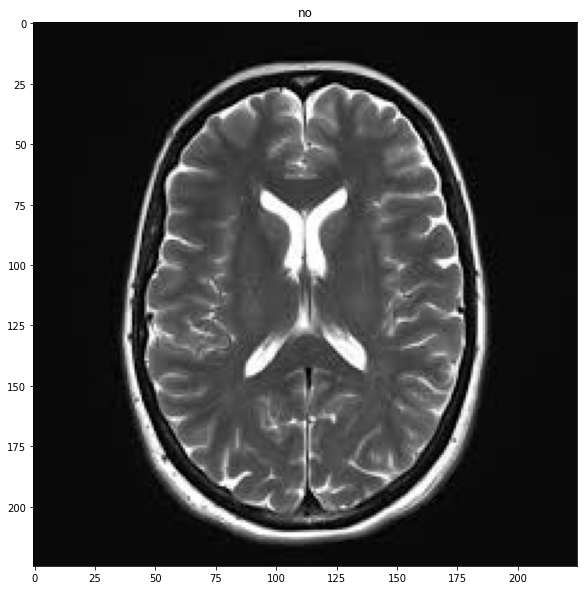

In [28]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'yes')

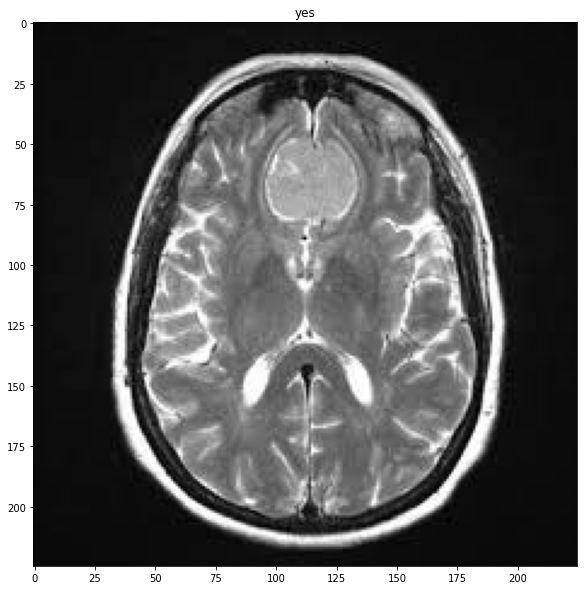

In [29]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

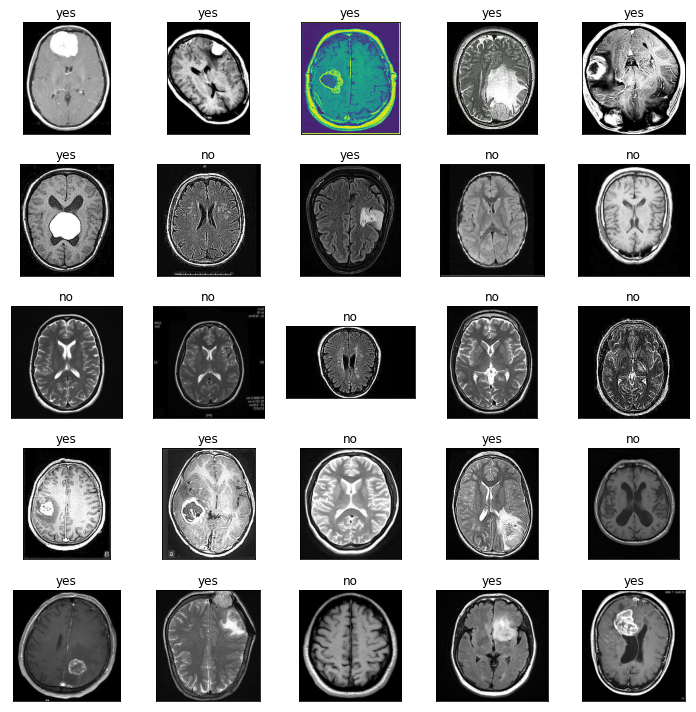

In [30]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

### MODEL TRAINING OF DATA ###

In [31]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [32]:
print(train_data.shape)

(2700, 2)


In [33]:
print(train_data.head())

                                      JPG TUMOR_CATEGORY
433    C:\Users\DELL\archive\yes\y715.jpg            yes
1151   C:\Users\DELL\archive\no\no113.jpg             no
73     C:\Users\DELL\archive\no\no194.jpg             no
1536  C:\Users\DELL\archive\yes\y1485.jpg            yes
2709   C:\Users\DELL\archive\yes\y717.jpg            yes


In [34]:
print(test_data.shape)

(300, 2)


In [35]:
print(test_data.head())

                                      JPG TUMOR_CATEGORY
1801   C:\Users\DELL\archive\yes\y627.jpg            yes
1190  C:\Users\DELL\archive\yes\y1107.jpg            yes
1817  C:\Users\DELL\archive\no\no1188.jpg             no
251    C:\Users\DELL\archive\no\no588.jpg             no
2505   C:\Users\DELL\archive\yes\y707.jpg            yes


### IMAGE DATA GENERATOR WITHOUT DIVERSIFICATION ###

In [36]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [37]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [38]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [39]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


### PERFORMING THE NECESSARY CHECKS ###

In [41]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [42]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [43]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [44]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 0, 0, 0]
(200, 200, 1)


In [45]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 0, 0, 1, 1]
(200, 200, 1)


In [46]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 0, 0, 1]
(200, 200, 1)


### MODEL : CNN FOR NON-DIVERSIFICATION ###

In [48]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))

In [49]:
# MODEL COMPILATION
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [50]:
# MODEL FITTING
CNN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=30,steps_per_epoch=120)

Epoch 1/30
120/120 [==============================] - 334s 3s/step - loss: 0.6546 - accuracy: 0.7192 - val_loss: 0.4936 - val_accuracy: 0.7778
Epoch 2/30
120/120 [==============================] - 348s 3s/step - loss: 0.4277 - accuracy: 0.8121 - val_loss: 0.4326 - val_accuracy: 0.8259
Epoch 3/30
120/120 [==============================] - 354s 3s/step - loss: 0.3368 - accuracy: 0.8573 - val_loss: 0.2946 - val_accuracy: 0.8667
Epoch 4/30
120/120 [==============================] - 323s 3s/step - loss: 0.2726 - accuracy: 0.8887 - val_loss: 0.2122 - val_accuracy: 0.9259
Epoch 5/30
120/120 [==============================] - 382s 3s/step - loss: 0.2291 - accuracy: 0.9126 - val_loss: 0.1639 - val_accuracy: 0.9481
Epoch 6/30
120/120 [==============================] - 338s 3s/step - loss: 0.1686 - accuracy: 0.9356 - val_loss: 0.1561 - val_accuracy: 0.9593
Epoch 7/30
120/120 [==============================] - 327s 3s/step - loss: 0.1558 - accuracy: 0.9435 - val_loss: 0.1293 - val_accuracy: 0.9519

### MODEL SUMMARY ###

In [52]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

In [53]:
#CHECKING MODEL WITH GRAPHICS

HistoryDict = CNN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


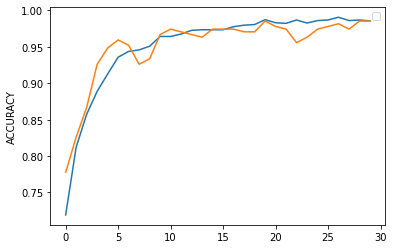

In [54]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

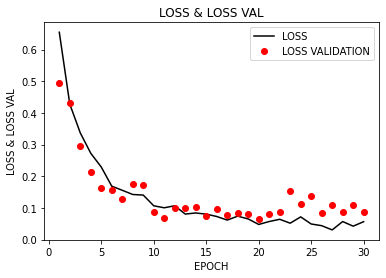

In [55]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

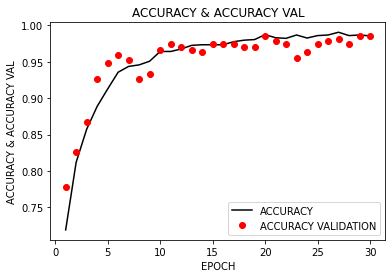

In [56]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<AxesSubplot:>

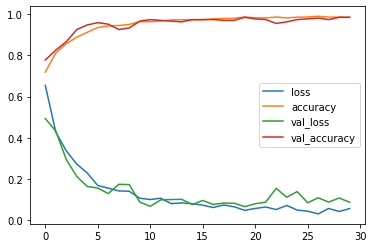

In [57]:
Dict_Summary = pd.DataFrame(CNN_Model.history)
Dict_Summary.plot()

In [58]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.1351
ACCURACY:  0.97


In [59]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [62]:
print(Main_Data_Prediction.head())
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

                                     JPG
0   C:\Users\DELL\archive\pred\pred0.jpg
1   C:\Users\DELL\archive\pred\pred1.jpg
2  C:\Users\DELL\archive\pred\pred10.jpg
3  C:\Users\DELL\archive\pred\pred11.jpg
4  C:\Users\DELL\archive\pred\pred12.jpg


In [63]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [67]:
Model_Test_Prediction = Model.predict(Main_Test_Set)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

3/3 [==============================] - 3s 760ms/step


In [65]:
print(Model_Test_Prediction)

[[9.99998927e-01 1.06138316e-06]
 [7.90342547e-09 1.00000000e+00]
 [2.08085090e-01 7.91914999e-01]
 [9.33607161e-01 6.63927794e-02]
 [5.76434308e-04 9.99423623e-01]
 [1.56191364e-02 9.84380841e-01]
 [1.00000000e+00 5.12092488e-15]
 [1.09936083e-02 9.89006400e-01]
 [7.65693933e-02 9.23430622e-01]
 [4.46587428e-02 9.55341280e-01]
 [9.98485625e-01 1.51438906e-03]
 [9.99987960e-01 1.19812776e-05]
 [9.99997735e-01 2.25053122e-06]
 [7.42213249e-01 2.57786751e-01]
 [9.55515027e-01 4.44849059e-02]
 [7.38104281e-04 9.99261916e-01]
 [9.99774516e-01 2.25512020e-04]
 [9.99602616e-01 3.97398340e-04]
 [3.21679363e-05 9.99967813e-01]
 [9.92127538e-01 7.87248276e-03]
 [9.78316087e-03 9.90216851e-01]
 [3.12366355e-02 9.68763351e-01]
 [1.00000000e+00 5.89479354e-10]
 [9.97779429e-01 2.22058012e-03]
 [1.00000000e+00 7.10779689e-24]
 [9.99987960e-01 1.20622881e-05]
 [9.99997854e-01 2.19750700e-06]
 [1.00000000e+00 1.72914358e-08]
 [4.81660565e-04 9.99518394e-01]
 [9.99999881e-01 1.15185507e-07]
 [7.551039

In [68]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR']


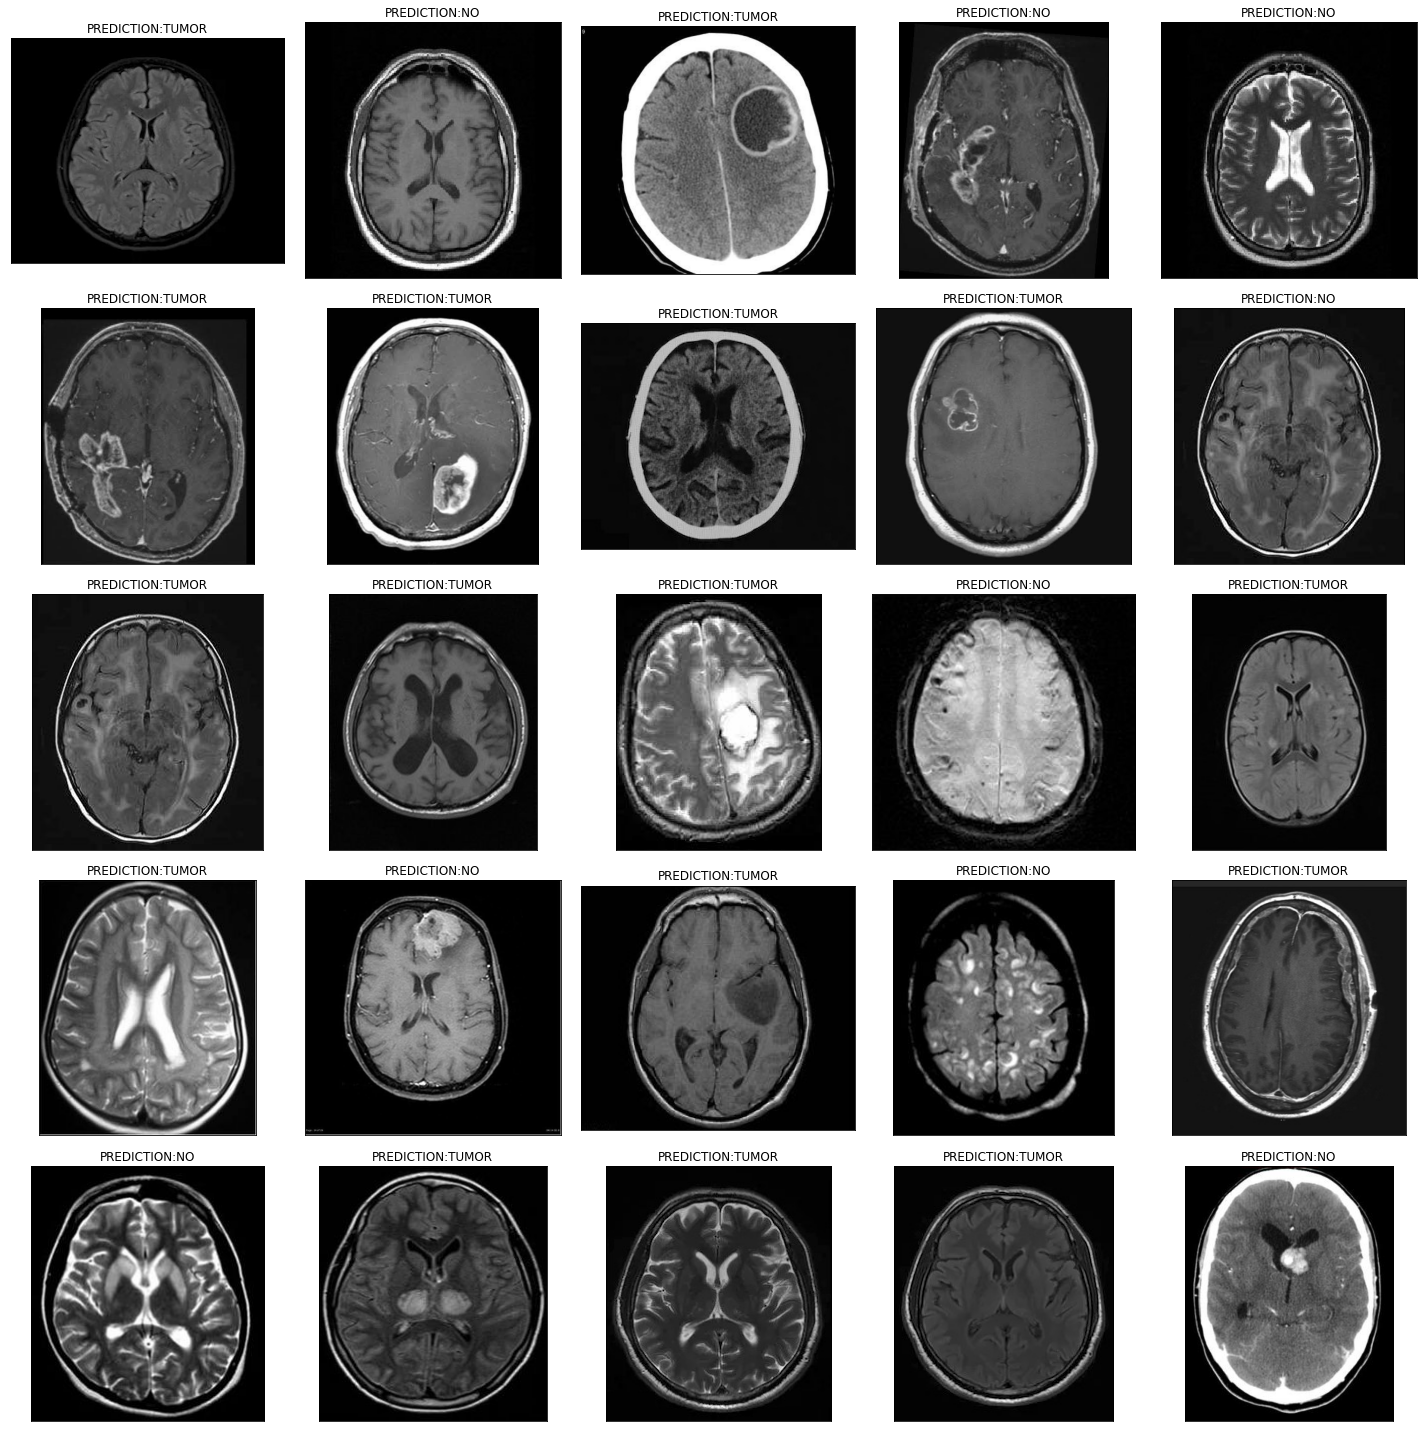

In [69]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

### RESNET 50 ###